# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import pwca
from pwca import determine_data_fitting_region,pwca_catalog,metadata_dict,advanced_gmvx_plot

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from Welsh Puck (aka pwca).
(pwca.core)>> Catalog of calibration runs stored to "pwca.pwca_catalog"
(pwca.core)>> Metadata dictionary for calibration runs stored to "pwca.metadata_dict"
(pwca.core)>> Metadata dictionary for Ed's catalog paper stoed to "pwca.catalog_paper_metadata"


## This is notebook is only for scratch code and prototyping

In [2]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_intial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2 = raw_domain.T


# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
q = 1.0/eta2q(eta)
model_domain = array( [ u, eta, delta, a1 ] ).T

# Load and unpuack physical parameter space -- dphi
dphi_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_dphase_parameters.txt')
nu4,nu5,nu6,ze2 = dphi_range.T

# Load and unpuack physical parameter space -- amp
amp_range = loadtxt('/Users/book/KOALA/puck/ll/data/version2/fit_opt_amplitude_parameters.txt')
mu0, mu1, mu2, mu3, mu4 = amp_range.T

# labels={'python':['nu4',('u', 'eta', 'chi_eff', 'chi_p'),''],'latex':['nu4',(r'u', r'\eta', r'\chi_s', r'\chi_p'),'']}

In [3]:
a1 = array( [ round(k,2) for k in a1 ] )

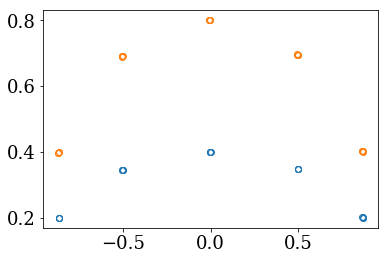

In [4]:
plot( u[a1==0.4], chi_p[a1==0.4], marker='o', ls='none', mfc='none' )
plot( u[a1==0.8], chi_p[a1==0.8], marker='o', ls='none', mfc='none' )

(gmvpfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '1' '0']
&& The current estimator value is 0.537351

(gmvpfit)>> Now working deg = 2
&& The estimator has changed by -0.203339
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '13' '11' '1' '03' '01' '00' '0']
&& The current estimator value is 0.334011

(gmvpfit)>> Now working deg = 3
&& The estimator has changed by -0.026657
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '13' '113' '111' '11' '1' '03' '013' '01' '003' '001' '000' '00'
 '0']
&& The current estimator value is 0.307354

(gmvpfit)>> Now working deg = 4
&& The estimator has changed by -0.084213
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '13' '113' '1113' '1' '03' '013' '0113' '0111' '011' '01' '003'
 '0013' '0011' '001' '0003' '0001' '000' '00' '0']
&& The current estimator value is 0.223141

(gmvpfit)>> Now work

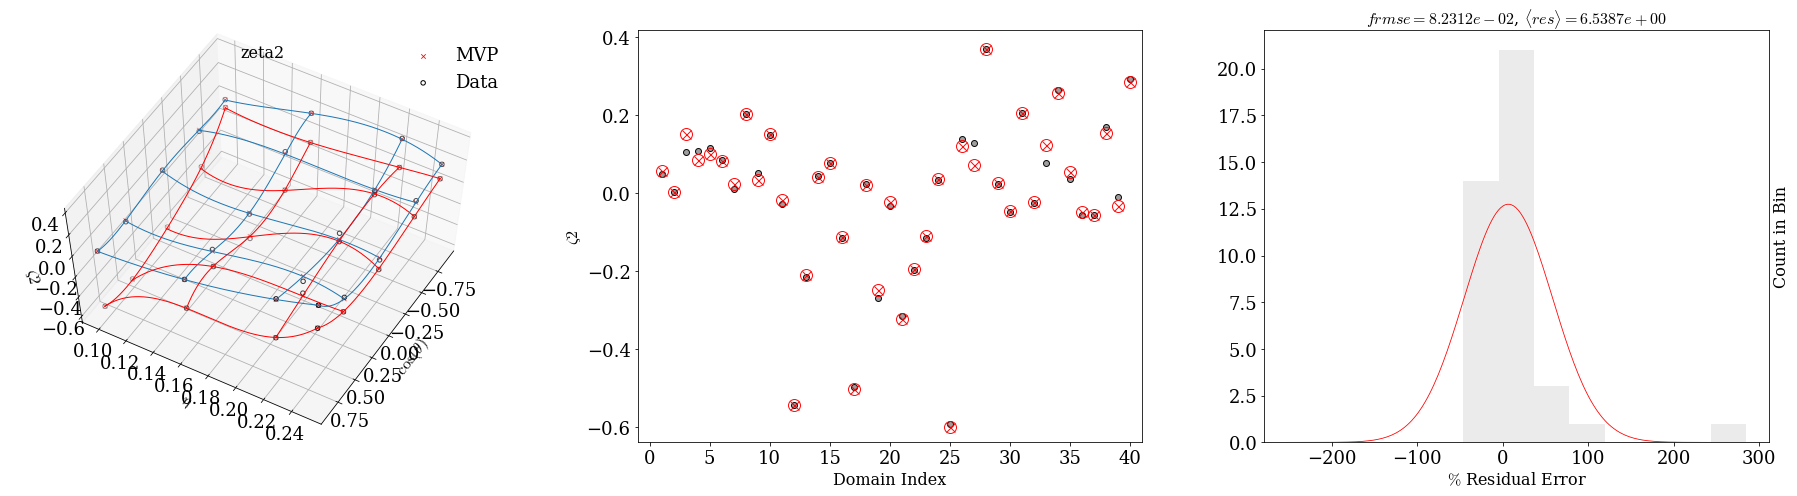

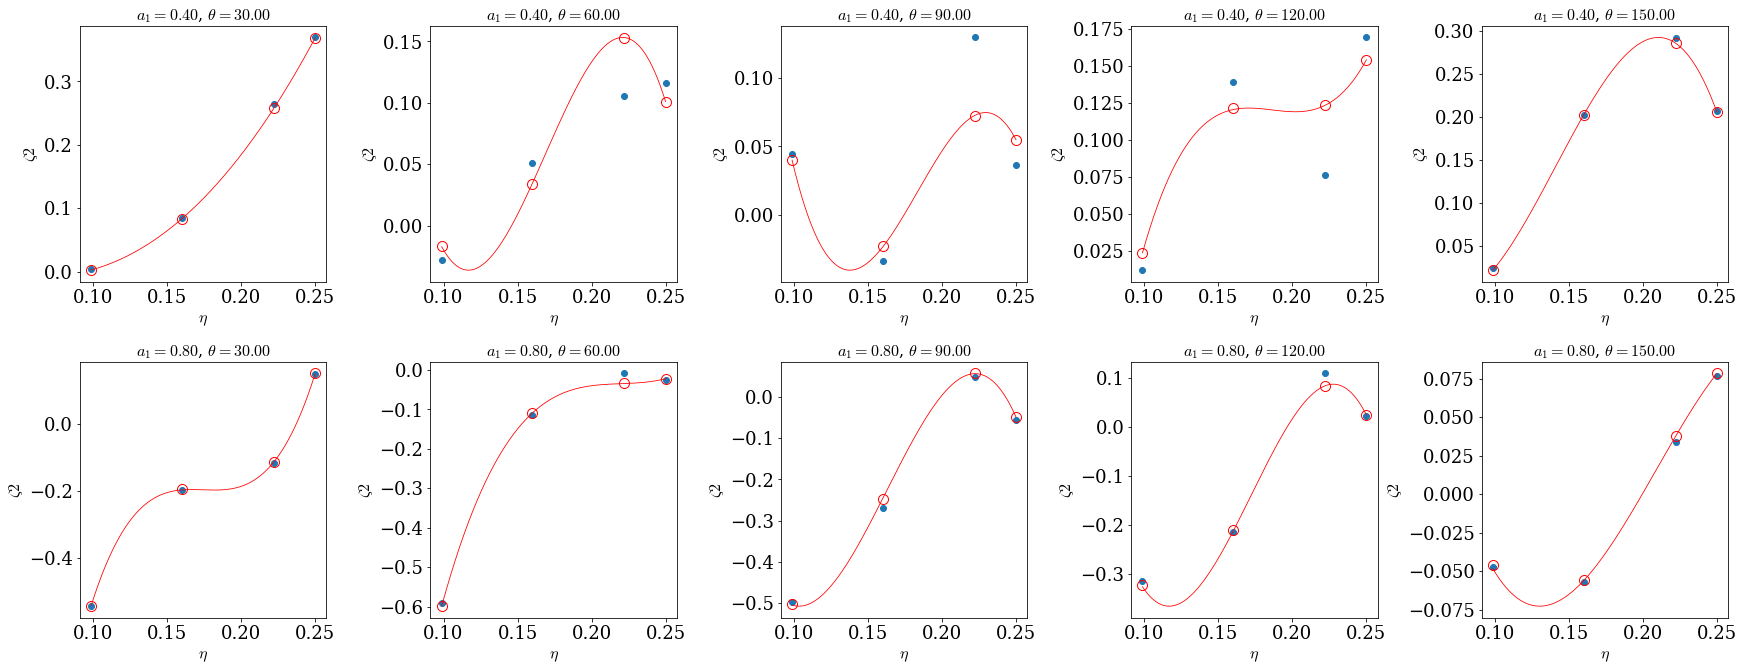

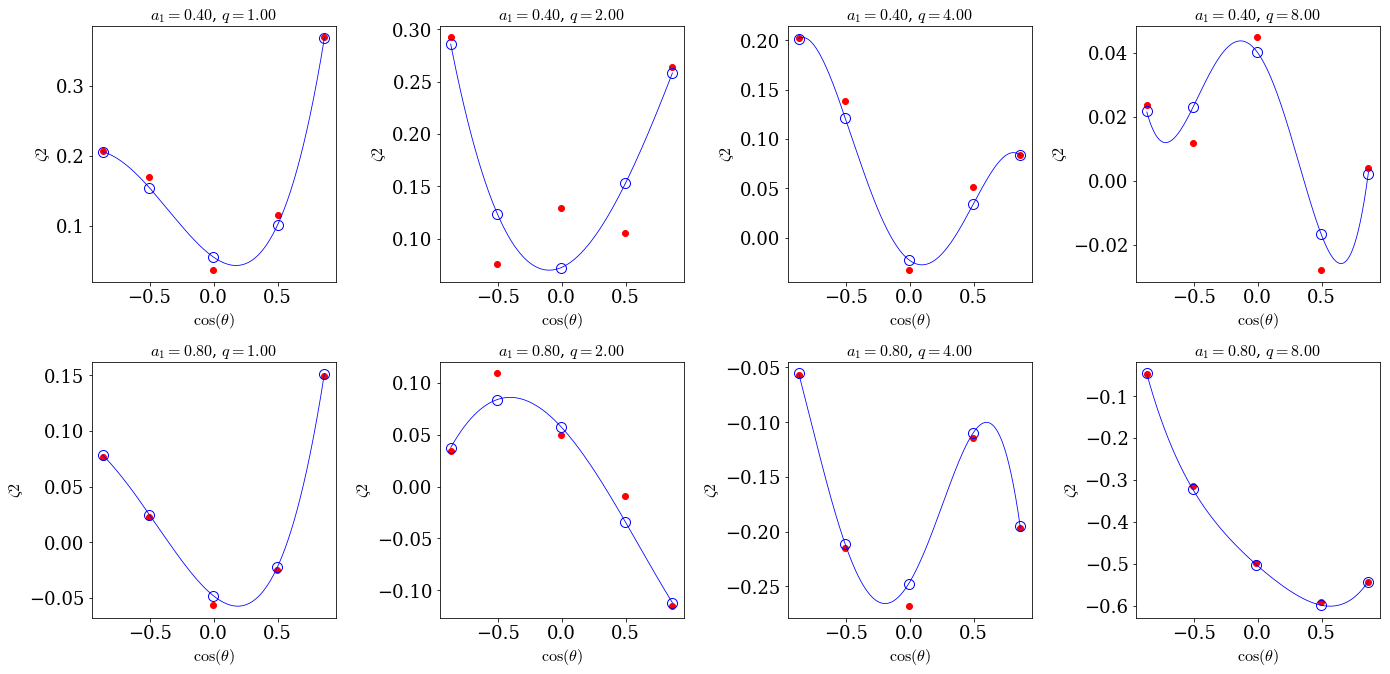

In [32]:

# version 1: u, eta, chi_eff, chi_p
# syntax: 
# nu5, mu2

# version 2: u, eta, a1
# syntax: gmvpfit( trial_model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# nu4, nu6, mu1, mu3, mu4 

'''
* use mvr for nu5, mu2, mu4
'''

#
foo = {}

# # nu4
# # ---
# key = 'nu4'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu4,fitatol=0.0001,verbose=True,maxdeg_list=[3,1,1,1],center=True,labels=labels,estatol=0.015)
# advanced_gmvx_plot(foo[key]); show();

# # nu5
# # ---
# key = 'nu5'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu5,fitatol=0.0001,verbose=True,maxdeg_list=[2,1,1,1],center=True,labels=labels)
# advanced_gmvx_plot(foo[key]); show();

# # nu6
# # ---
# key = 'nu6'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu6,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,1],center=True,labels=labels,estatol=0.03)
# advanced_gmvx_plot(foo[key]); show();
# # advanced_gmvx_plot(foo[key]); show();

# ze2
# ---
key = 'zeta2'
labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
foo[key] = gmvpfit( model_domain, ze2,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,1],center=True,labels=labels,estatol=0.05)
advanced_gmvx_plot(foo[key]); show();

# # mu0 
# # ---
# key = 'mu0'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu0,fitatol=0.0001,verbose=True,maxdeg_list=[4,1,1,1],center=True,labels=labels,estatol=0.015)
# advanced_gmvx_plot(foo[key]); show();

# # mu1 
# # ---
# key = 'mu1'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,0,3,1],center=True,labels=labels,estatol=0.015)
# advanced_gmvx_plot(foo[key]); show();

# # mu2
# # ---
# key = 'mu2'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu2,fitatol=0.001,verbose=True,maxdeg_list=[3,2,0,1],center=True,labels=labels)
# advanced_gmvx_plot(foo[key]); show();

# # mu3
# # ---
# key = 'mu3'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu3,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,1],center=True,estatol=0.005,labels=labels)
# advanced_gmvx_plot(foo[key]); show();

# # mu4
# # ---
# key = 'mu4'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu4,fitatol=0.0001,verbose=True,maxdeg_list=[3,1,1,1],center=True,labels=labels)
# advanced_gmvx_plot(foo[key]); show();
